In [1]:
##准备数据
import pandas as pd
import numpy as np

#使用pandas读取位于input文件夹下的数据集
crimes1 = pd.read_csv('./input/Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
crimes2 = pd.read_csv('./input/Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
crimes3 = pd.read_csv('./input/Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip')

#将数据集合并
crimes = pd.concat([crimes1, crimes2, crimes3], ignore_index=False, axis=0)

# 删除单独的数据框以释放内存
del crimes1
del crimes2
del crimes3

#打印数据集已就位
print('Dataset ready.. 数据集已经准备就绪')

# 删除重复的行，基于'ID'和'Case Number'列
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

# 打印删除重复行后的数据集形状
print('Dataset Shape after drop_duplicate（删除id和case number重复行）: ', crimes.shape)

Dataset ready.. 数据集已经准备就绪
Dataset Shape after drop_duplicate（删除id和case number重复行）:  (4336556, 23)


In [2]:
#删除无关列
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location'], inplace=True, axis=1)



In [3]:
#查看前三行
crimes.head(3)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,1136872.0,1936499.0,41.981913,-87.771996
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,1181027.0,1861693.0,41.775733,-87.611920
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,1186023.0,1859609.0,41.769897,-87.593671


In [4]:
# 将日期转换为pandas可以理解的日期时间格式 
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# 将日期设置为索引
crimes.index = pd.DatetimeIndex(crimes.Date)

In [5]:
crimes.shape


(4336556, 13)

In [6]:
crimes.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4336556 entries, 2006-04-02 13:00:00 to 2016-05-03 23:38:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 405.3+ MB


In [7]:
# 将Location Description、Description、Primary Type列中出现次数小于20的值替换为'OTHER'
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [8]:
#将Primary Type、Location Description、Description列转换为分类变量
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

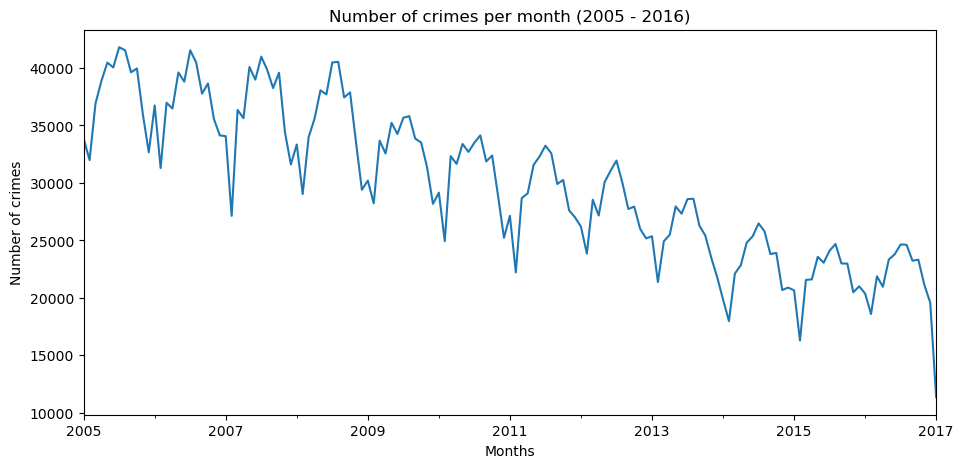

In [9]:
import matplotlib.pyplot as plt

# 绘制每个月的犯罪数量
plt.figure(figsize=(11,5))
crimes.resample('ME').size().plot(legend=False)
plt.title('Number of crimes per month (2005 - 2016)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()


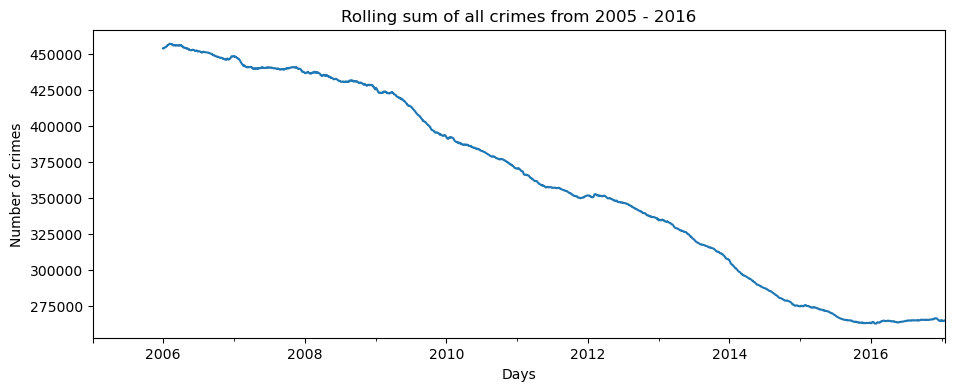

In [10]:

# 绘制每天的犯罪数量
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\3859675348.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)


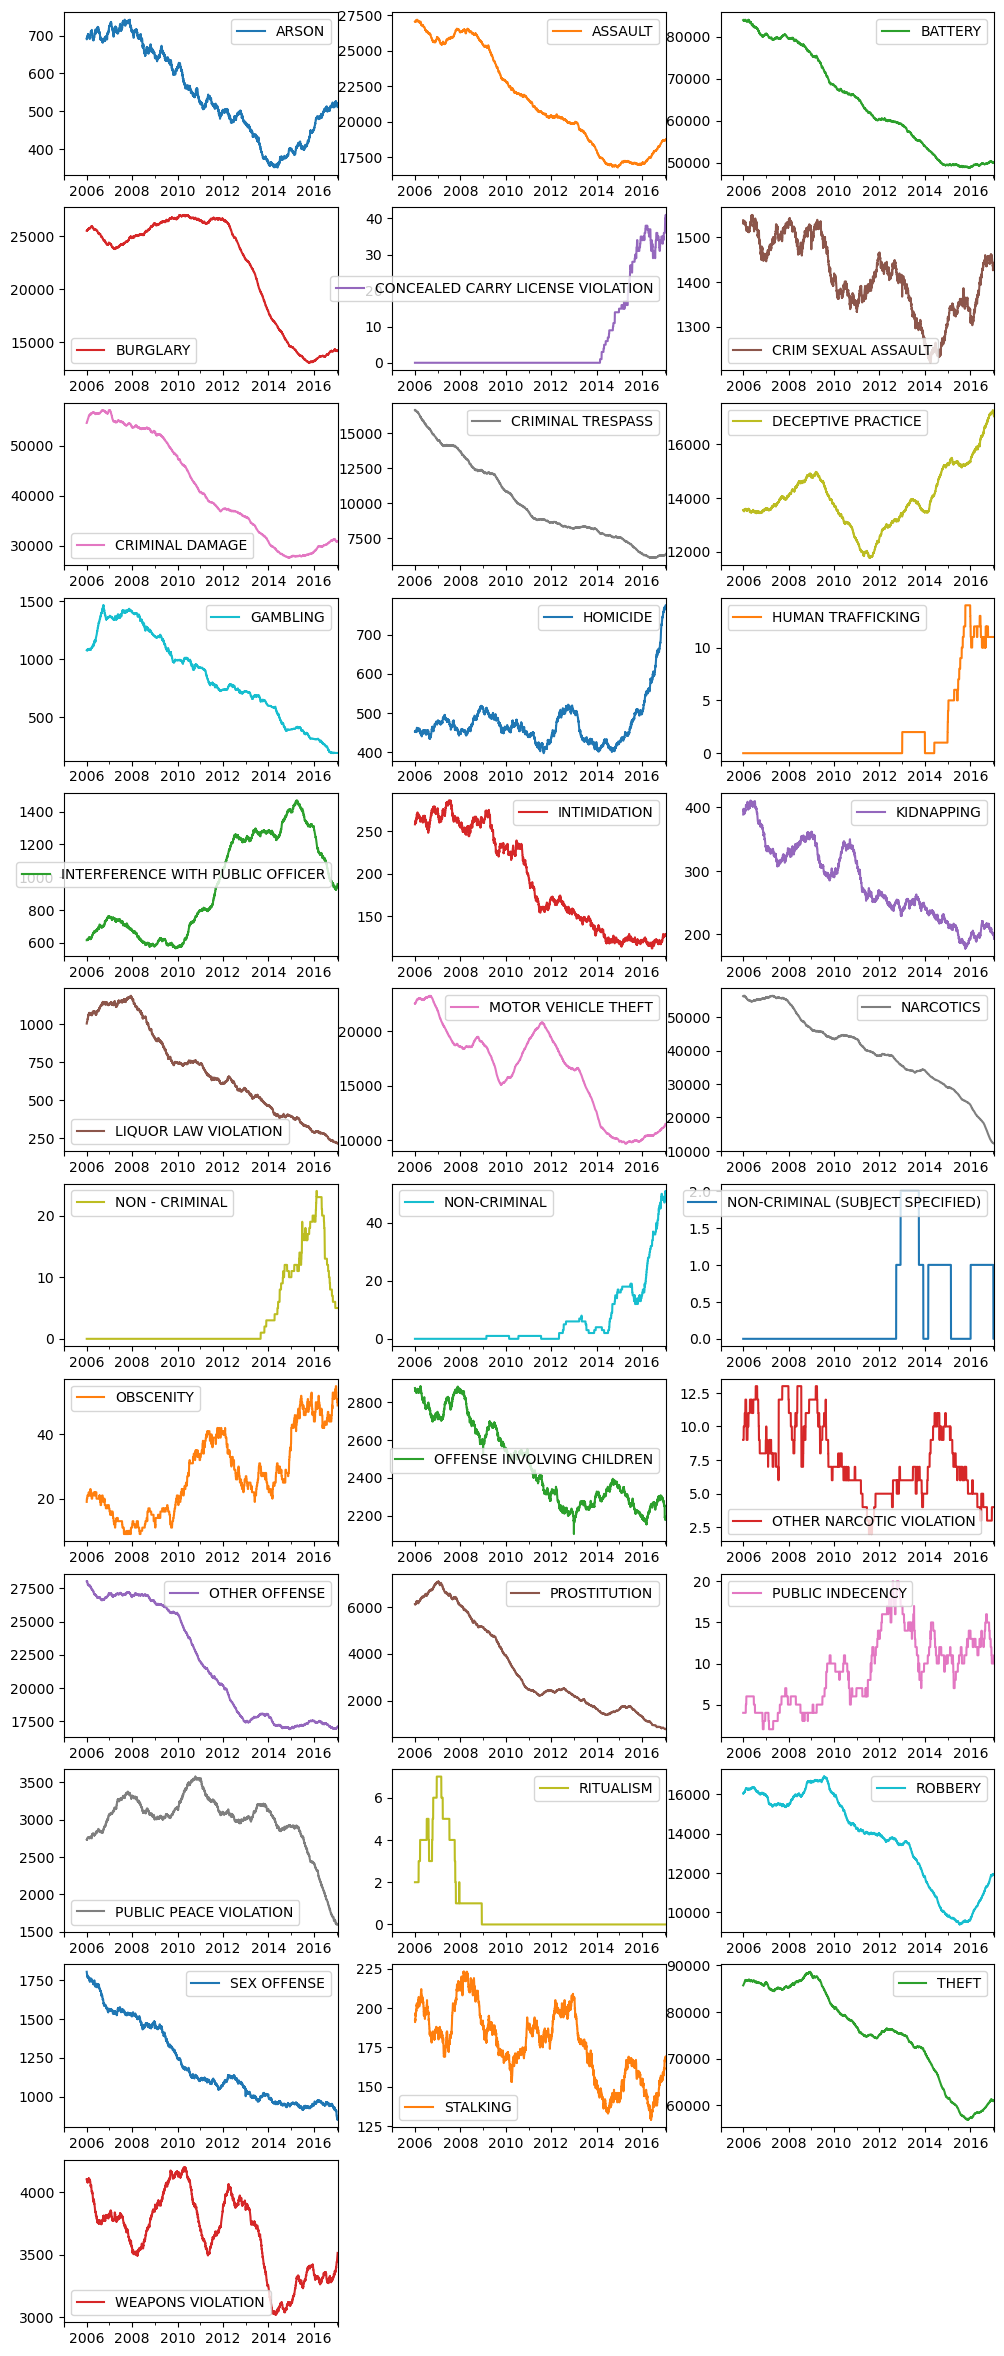

In [11]:

# 创建一个以日期为索引，以犯罪类型为列的透视表
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
# 将索引转换为DatetimeIndex
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
# 绘制每个犯罪类型在每天的犯罪数量
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

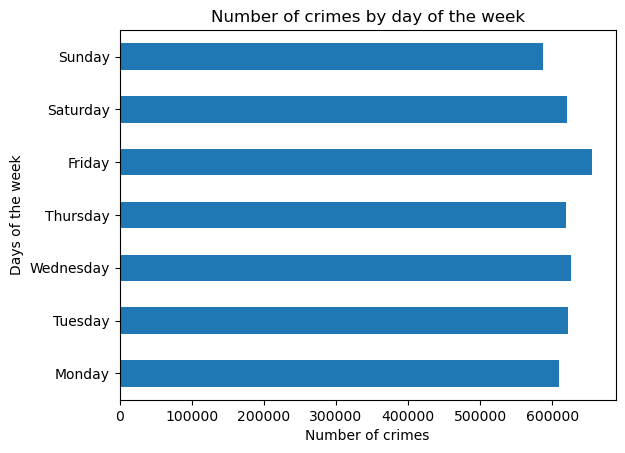

In [12]:

# 创建一个包含星期几的列表
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
# 按星期几分组，并绘制每个犯罪类型在每天的犯罪数量
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

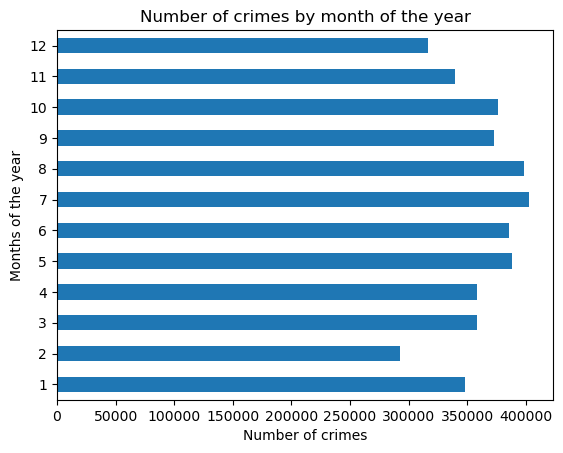

In [13]:
# 按月份分组，并绘制每个犯罪类型在每个月的犯罪数量
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\657567196.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')


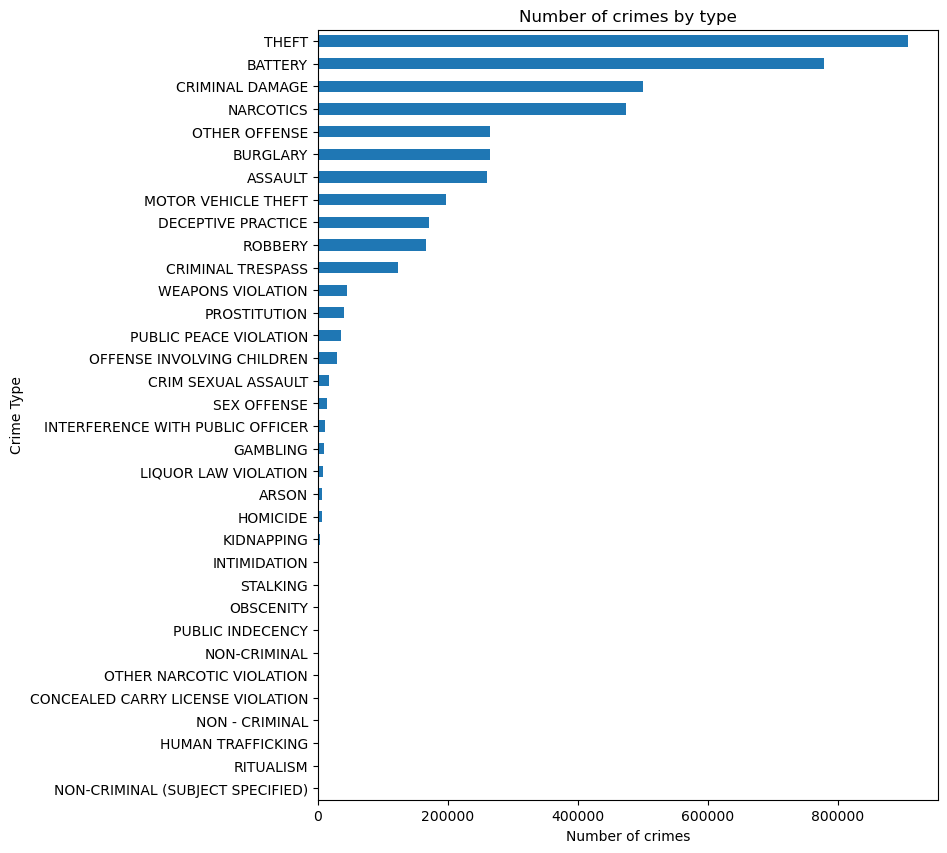

In [14]:

# 按犯罪类型分组，并绘制每个犯罪类型在每个月的犯罪数量
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\2337297601.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')


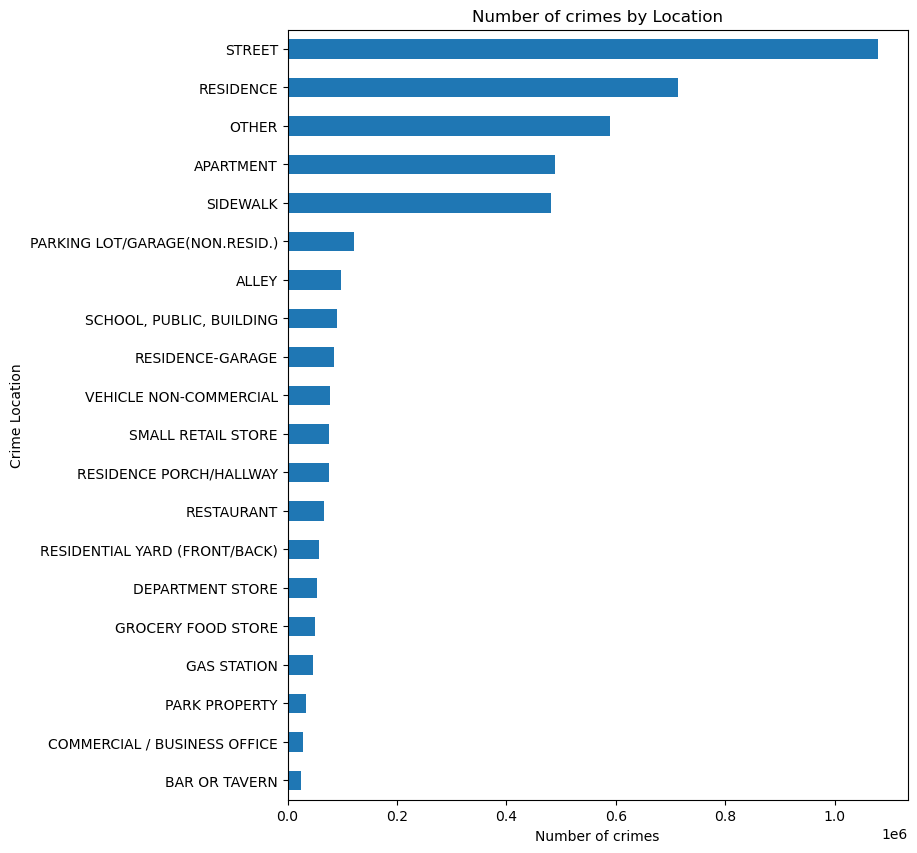

In [15]:

# 按犯罪地点分组，并绘制每个犯罪地点在每个月的犯罪数量
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [16]:
hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size, observed=False).fillna(0)
hour_by_type     = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size, observed=False).fillna(0)
hour_by_week     = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.day_name(), aggfunc=np.size, observed=False).fillna(0)
hour_by_week     = hour_by_week[days].T # 按照days中的顺序重新排列列
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.dayofweek, aggfunc=np.size, observed=False).fillna(0)
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size, observed=False).fillna(0)
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size, observed=False).fillna(0)

In [17]:
# 使用层次聚类算法对数据进行聚类
from sklearn.cluster import AgglomerativeClustering as AC
import numpy as np
import matplotlib.pyplot as plt

def scale_df(df, axis=0):
    '''
    一个用于缩放数值（z-scale）使其均值为零且方差为1的实用函数。
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    一个用于绘制显示时间模式的热图的函数
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    '''
    一个包装函数，用于计算df每行内的缩放值并绘制热图
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # 一个让热图更好看的技巧
    cap = np.min([np.max(df_marginal_scaled.values), np.abs(np.min(df_marginal_scaled.values))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

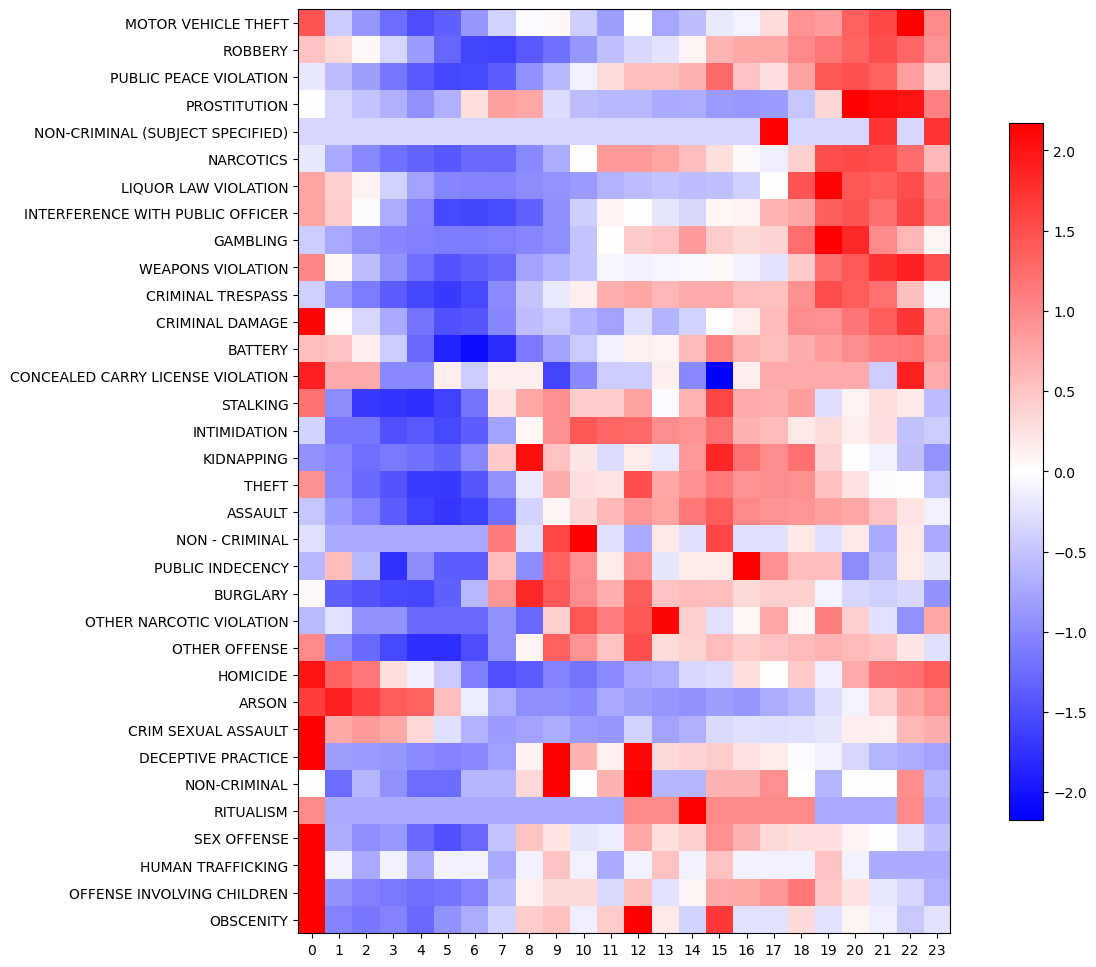

In [18]:
plt.figure(figsize=(15,12))
scale_and_plot(hour_by_type)

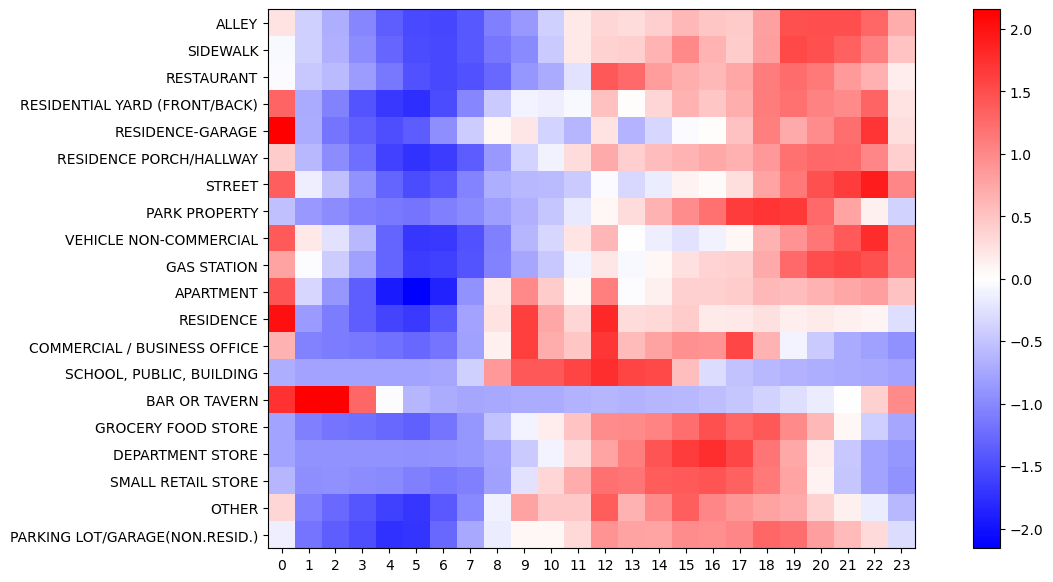

In [19]:
plt.figure(figsize=(15,7))
scale_and_plot(hour_by_location)

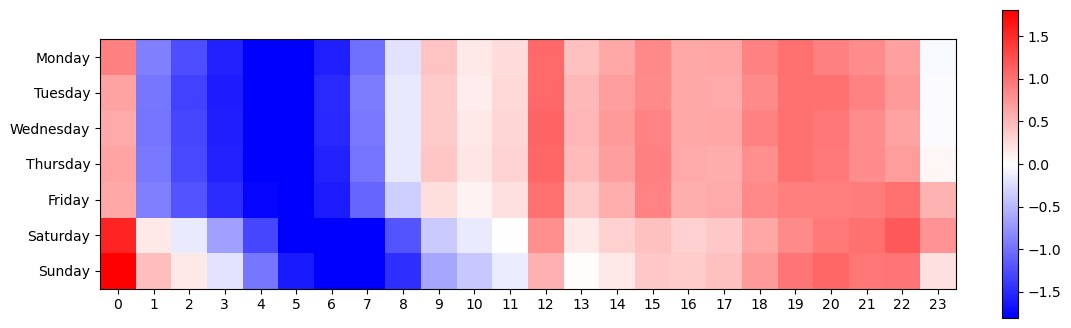

In [20]:
plt.figure(figsize=(12,4))
scale_and_plot(hour_by_week, ix=np.arange(7))

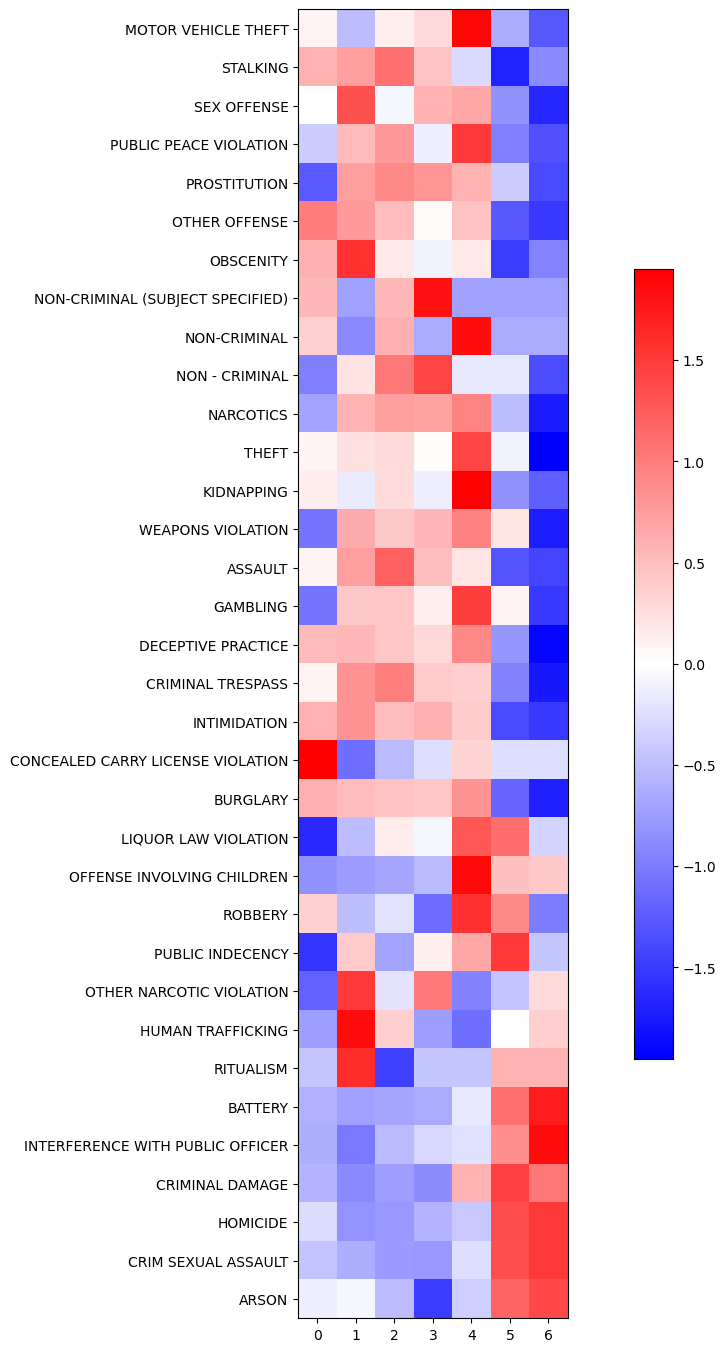

In [21]:
plt.figure(figsize=(17,17))
scale_and_plot(dayofweek_by_type)

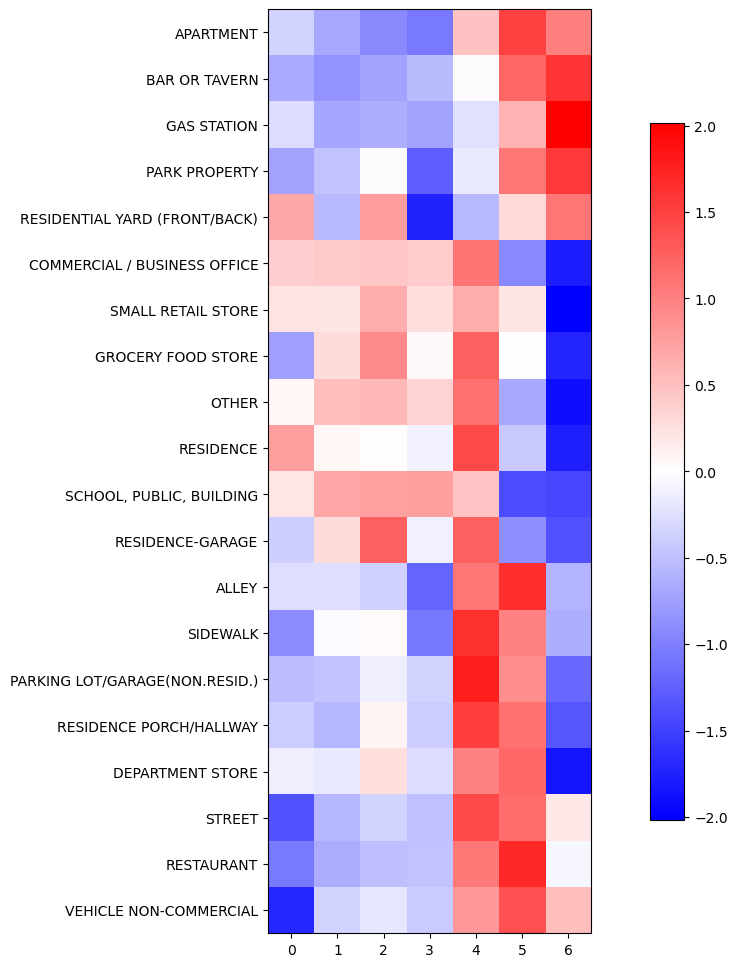

In [22]:
plt.figure(figsize=(15,12))
scale_and_plot(dayofweek_by_location)

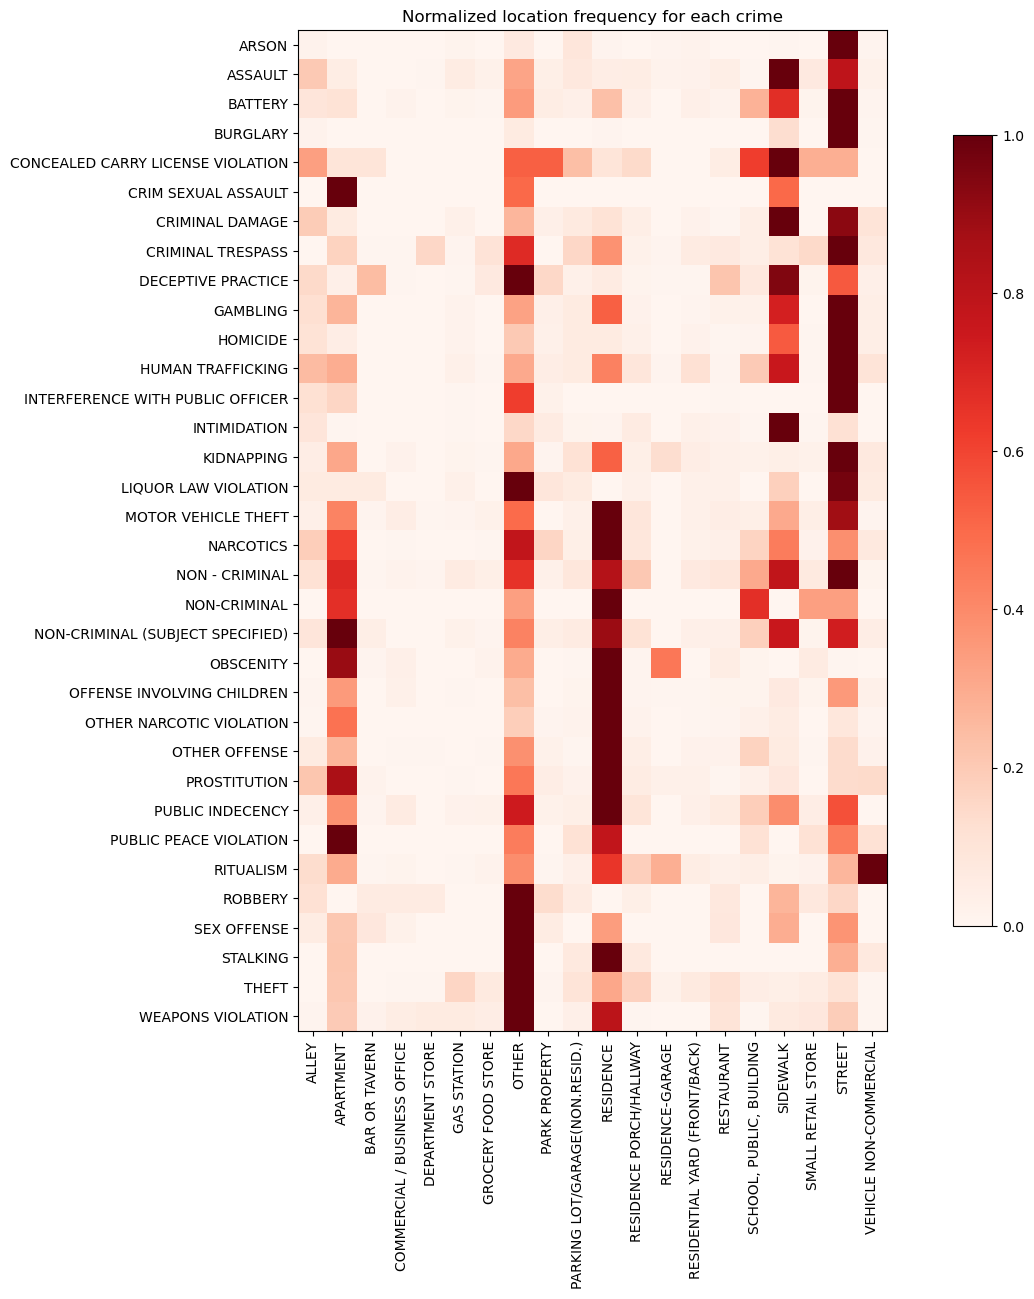

In [23]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [24]:
crimes.iloc[(crimes[['Longitude']].values < -88.0).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Longitude']].values > -87.5).flatten(), crimes.columns=='Longitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values < 41.60).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.iloc[(crimes[['Latitude']].values > 42.05).flatten(),  crimes.columns=='Latitude'] = 0.0
crimes.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
crimes.dropna(inplace=True)

In [25]:
import seaborn as sns

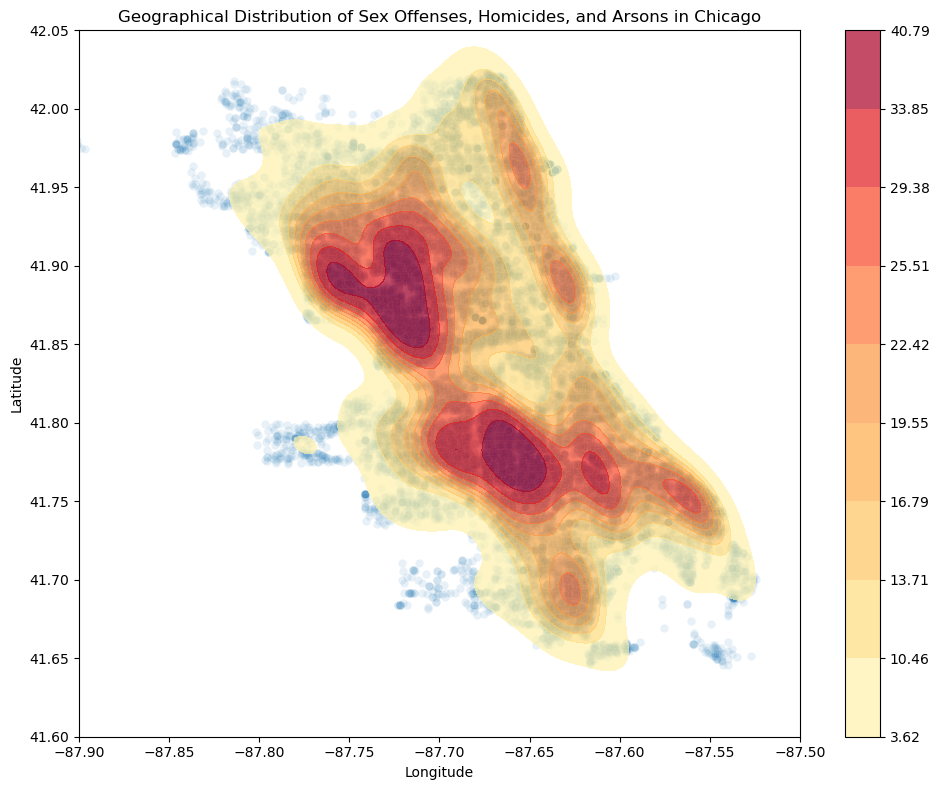

In [ ]:
# 筛选特定类型的犯罪
crimes_new = crimes[(crimes['Primary Type'].isin(['SEX OFFENSE', 'HOMICIDE', 'ARSON']))]

# 创建图形
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制散点图
sns.scatterplot(x='Longitude', y='Latitude', 
                data=crimes_new, 
                alpha=0.1, 
                ax=ax)

# 绘制密度图
sns.kdeplot(data=crimes_new, 
            x='Longitude', y='Latitude',
            cmap="YlOrRd", 
            cbar=True, 
            fill=True, 
            alpha=0.7,
            levels=10,
            ax=ax)

# 设置坐标轴范围
ax.set_xlim(-87.9, -87.5)
ax.set_ylim(41.60, 42.05)

# 设置标题
plt.title('Geographical Distribution of Sex Offenses, Homicides, and Arsons in Chicago')

plt.tight_layout()
plt.show()

In [27]:
# 
ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']

C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\3705540213.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_groups = crimes.groupby('Primary Type')
C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\3705540213.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Longitude', y='Latitude', data=crime_data,
C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\3705540213.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Longitude', y='Latitude', data=crime_data,
C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\3705540213.py:26: FutureWarning

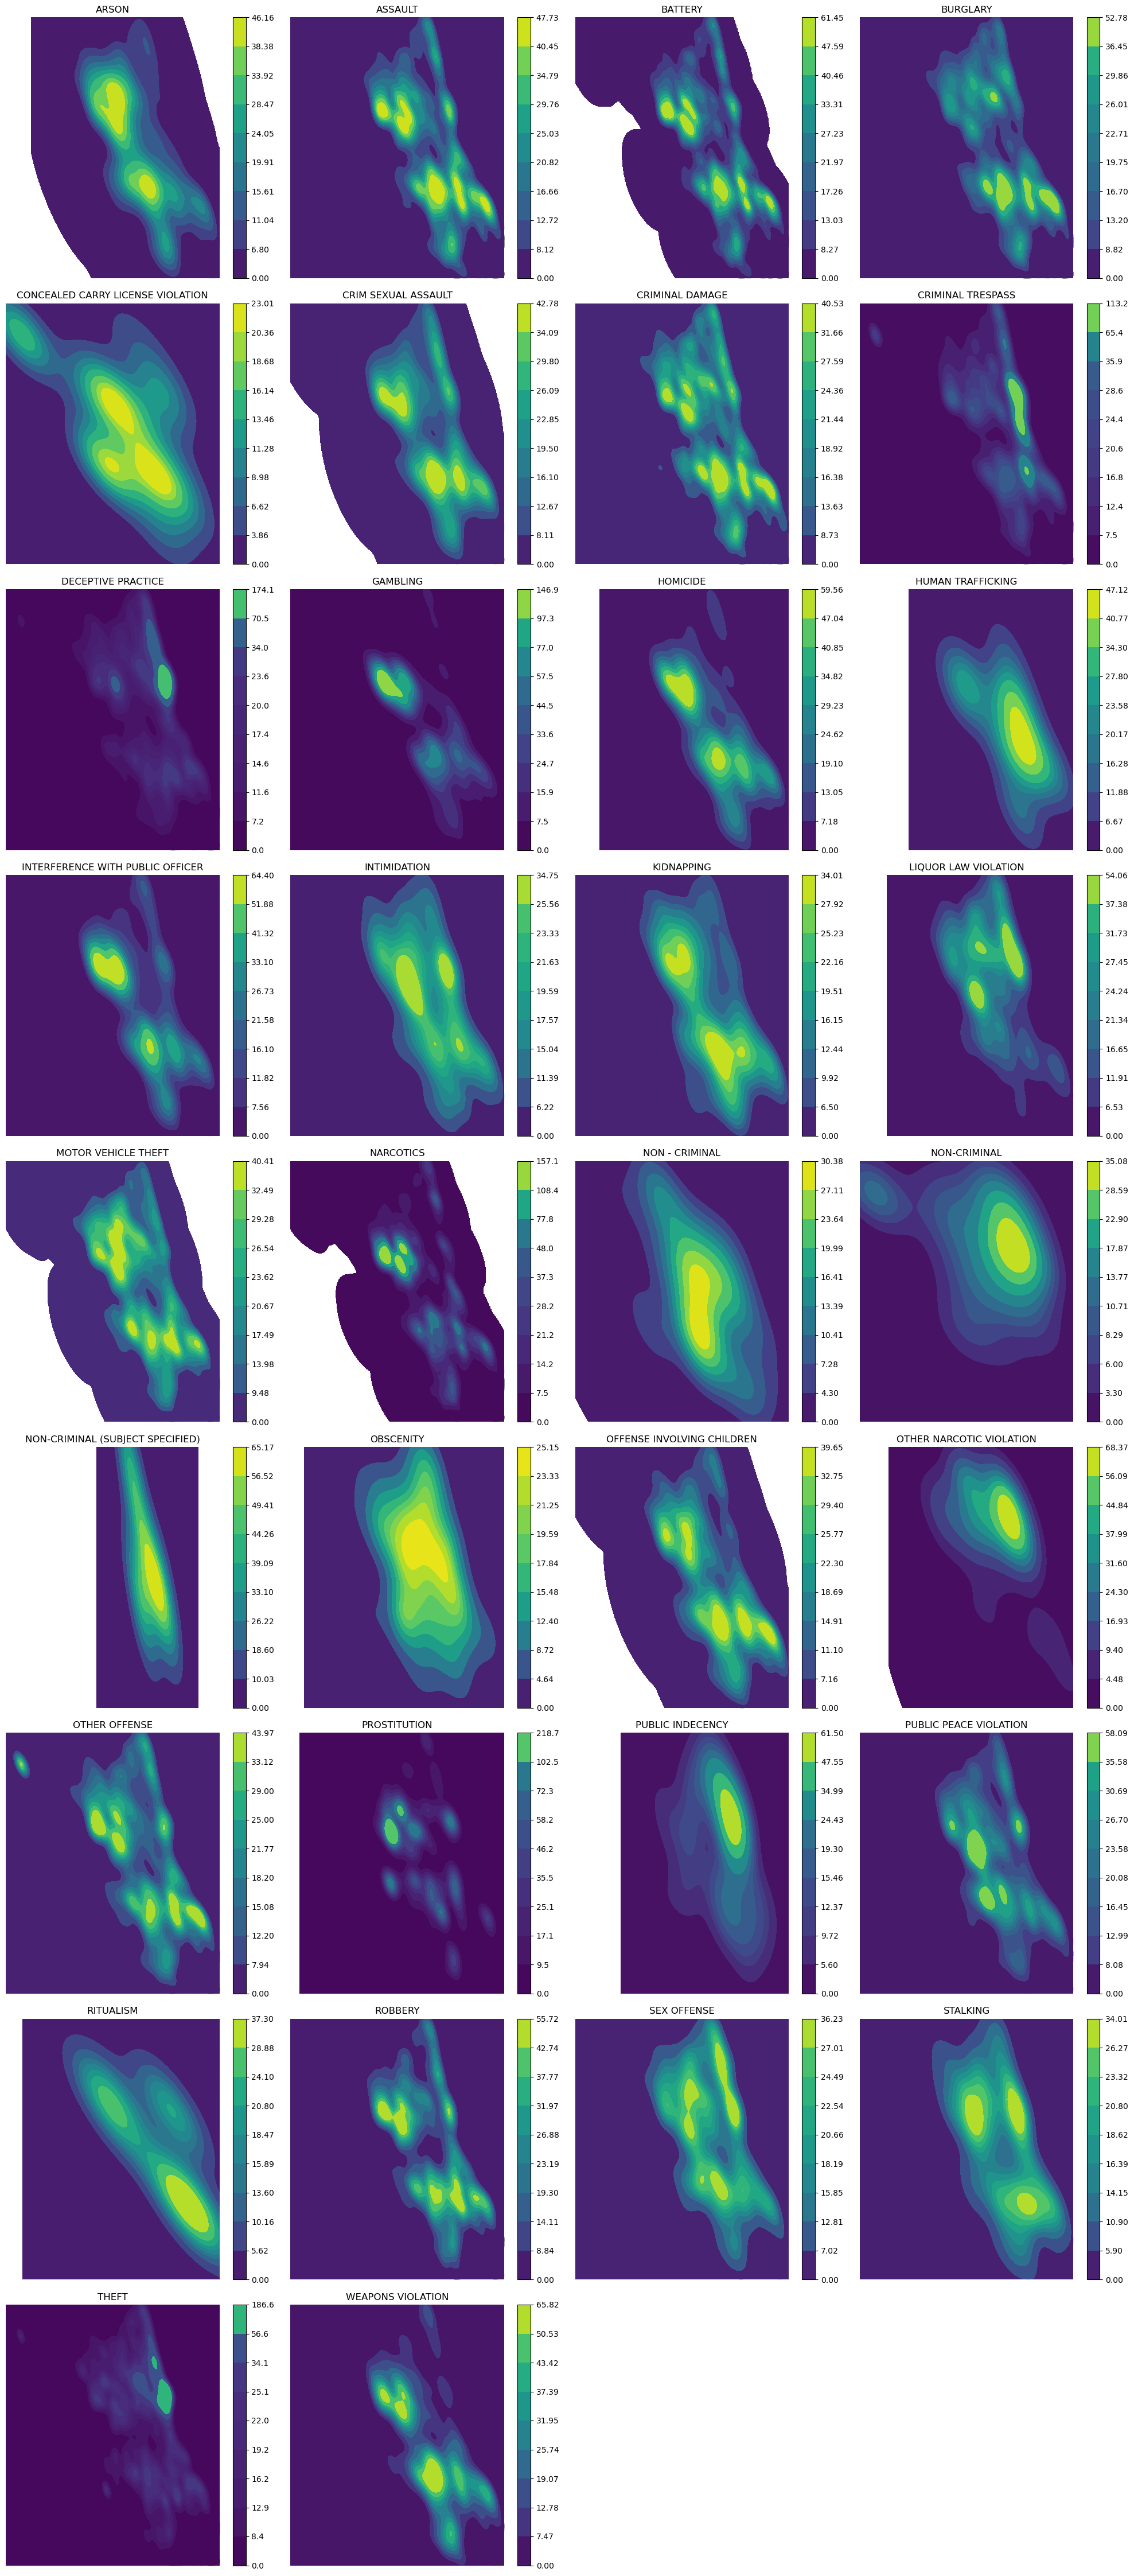

In [29]:
# 预处理数据
crime_groups = crimes.groupby('Primary Type')
ctypes = list(crime_groups.groups.keys())

# 计算适当的图形大小和布局
n_crimes = len(ctypes)
n_cols = 4
n_rows = int(np.ceil(n_crimes / n_cols))
fig_width = 5 * n_cols
fig_height = 5 * n_rows

# 创建图形
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
axes = axes.flatten()

# 计算经纬度范围
lon_min, lon_max = crimes['Longitude'].min(), crimes['Longitude'].max()
lat_min, lat_max = crimes['Latitude'].min(), crimes['Latitude'].max()

for i, (crime_type, crime_data) in enumerate(crime_groups):
    ax = axes[i]
    
    sns.scatterplot(x='Longitude', y='Latitude', data=crime_data, 
                    alpha=0.1, color='grey', ax=ax)
    
    sns.kdeplot(x='Longitude', y='Latitude', data=crime_data,
                cmap="viridis", levels=10, cbar=True, 
                shade=True, thresh=0, ax=ax)
    
    ax.set_title(crime_type)
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.set_axis_off()

# 移除多余的子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [30]:
from numpy.linalg import svd


class CA(object):
    """Simple corresondence analysis.
    
    Inputs
    ------
    ct : array_like
      Two-way contingency table. If `ct` is a pandas DataFrame object,
      the index and column values are used for plotting.
    Notes
    -----
    The implementation follows that presented in 'Correspondence
    Analysis in R, with Two- and Three-dimensional Graphics: The ca
    Package,' Journal of Statistical Software, May 2007, Volume 20,
    Issue 3.
    """

    def __init__(self, ct):
        self.rows = ct.index.values if hasattr(ct, 'index') else None
        self.cols = ct.columns.values if hasattr(ct, 'columns') else None
        
        # contingency table
        N = np.matrix(ct, dtype=float)

        # correspondence matrix from contingency table
        P = N / N.sum()

        # row and column marginal totals of P as vectors
        r = P.sum(axis=1)
        c = P.sum(axis=0).T

        # diagonal matrices of row/column sums
        D_r_rsq = np.diag(1. / np.sqrt(r.A1))
        D_c_rsq = np.diag(1. / np.sqrt(c.A1))

        # the matrix of standarized residuals
        S = D_r_rsq * (P - r * c.T) * D_c_rsq

        # compute the SVD
        U, D_a, V = svd(S, full_matrices=False)
        D_a = np.asmatrix(np.diag(D_a))
        V = V.T

        # principal coordinates of rows
        F = D_r_rsq * U * D_a

        # principal coordinates of columns
        G = D_c_rsq * V * D_a

        # standard coordinates of rows
        X = D_r_rsq * U

        # standard coordinates of columns
        Y = D_c_rsq * V

        # the total variance of the data matrix
        inertia = sum([(P[i,j] - r[i,0] * c[j,0])**2 / (r[i,0] * c[j,0])
                       for i in range(N.shape[0])
                       for j in range(N.shape[1])])

        self.F = F.A
        self.G = G.A
        self.X = X.A
        self.Y = Y.A
        self.inertia = inertia
        self.eigenvals = np.diag(D_a)**2

    def plot(self):
        """Plot the first and second dimensions."""
        xmin, xmax = None, None
        ymin, ymax = None, None
        if self.rows is not None:
            for i, t in enumerate(self.rows):
                x, y = self.F[i,0], self.F[i,1]
                plt.text(x, y, t, va='center', ha='center', color='r')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.F[:, 0], self.F[:, 1], 'ro')

        if self.cols is not None:
            for i, t in enumerate(self.cols):
                x, y = self.G[i,0], self.G[i,1]
                plt.text(x, y, t, va='center', ha='center', color='b')
                xmin = min(x, xmin if xmin else x)
                xmax = max(x, xmax if xmax else x)
                ymin = min(y, ymin if ymin else y)
                ymax = max(y, ymax if ymax else y)
        else:
            plt.plot(self.G[:, 0], self.G[:, 1], 'bs')

        if xmin and xmax:
            pad = (xmax - xmin) * 0.1
            plt.xlim(xmin - pad, xmax + pad)
        if ymin and ymax:
            pad = (ymax - ymin) * 0.1
            plt.ylim(ymin - pad, ymax + pad)

        plt.grid()
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')

    def scree_diagram(self, perc=True, *args, **kwargs):
        """Plot the scree diagram."""
        eigenvals = self.eigenvals
        xs = np.arange(1, eigenvals.size + 1, 1)
        ys = 100. * eigenvals / eigenvals.sum() if perc else eigenvals
        plt.plot(xs, ys, *args, **kwargs)
        plt.xlabel('Dimension')
        plt.ylabel('Eigenvalue' + (' [%]' if perc else ''))

In [31]:
#crime type x district
#crime type x location
#crime type x hour
#crime type x month
#crime type x dayofweek
#crime type x year

ctypexdistrict = crimes.pivot_table(values='ID', index='Primary Type', columns='District', aggfunc=np.size).fillna(0)
ctypexlocation = crimes.pivot_table(values='ID', index='Primary Type', columns='Location Description', aggfunc=np.size).fillna(0)
ctypexhour = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)
ctypexmonth = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.month, aggfunc=np.size).fillna(0)
ctypexyear = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.year, aggfunc=np.size).fillna(0)
ctypexdayofweek = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.dayofweek, aggfunc=np.size).fillna(0)

C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\692963886.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ctypexdistrict = crimes.pivot_table(values='ID', index='Primary Type', columns='District', aggfunc=np.size).fillna(0)
C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\692963886.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ctypexlocation = crimes.pivot_table(values='ID', index='Primary Type', columns='Location Description', aggfunc=np.size).fillna(0)
C:\Users\wylKI\AppData\Local\Temp\ipykernel_22068\692963886.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Spec

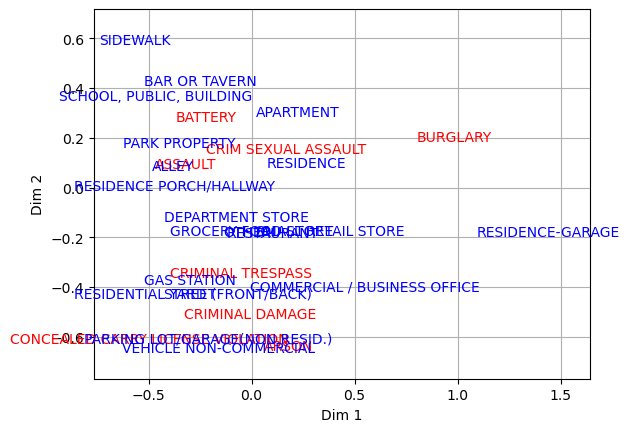

In [32]:
ctypes_short = ctypes[:8]
ca = CA(ctypexlocation.loc[ctypes_short])

plt.figure(100)
ca.plot()

# plt.figure(101)
# ca.scree_diagram()
# plt.show()